In [1]:
import numpy as np
import random
from genetic_algorithm import ga

In [2]:
# Set general parameters
chromosome_length = 100
population_size = 10
maximum_generation = 10
best_score_progress = [] # Tracks progress

# Create starting population
population = ga.create_starting_population(population_size, chromosome_length)

In [3]:
# Display best score in starting population
scores = ga.calculate_fitness(population)
best_score = np.max(scores)/chromosome_length * 100
print ('Starting best score, % target: ',best_score)

# Add starting best score to progress tracker
best_score_progress.append(best_score)

Starting best score, % target:  93.0


In [4]:
population_size_array = np.array([])
new_population_size = population_size
crossover_operator = '2X'
bisection_search = 0
success_population_sizes = np.array([])
success_population = np.array([]).reshape(0,100)

while(True):
    outcome = ga.run_generation(population, crossover_operator)
    population_size_array = np.hstack((population_size_array,new_population_size))
    
    if(outcome == 0 and new_population_size <= 2560):
        print(f'Fail - (population size: {len(population)})')
        if(bisection_search == 0):
            new_population_size = new_population_size*2
        else:
            midpoint_gap = abs((population_size_array[-1] - population_size_array[-2]))/2
            if(midpoint_gap < 10):
                break
            new_population_size =  population_size_array[-1] + midpoint_gap    
        
        population = ga.create_starting_population(int(new_population_size), chromosome_length)
        
    else:
        print(f'Success - (population size: {len(population)})')
        success_population_sizes = np.hstack((success_population_sizes,new_population_size))
        success_population = np.vstack((success_population,outcome.reshape(1,100)))
        if(len(population_size_array)==1):
            break
        bisection_search = 1
        midpoint_gap = abs((population_size_array[-1] - population_size_array[-2]))/2
        if(midpoint_gap < 10):
            break
        new_population_size = population_size_array[-1] - midpoint_gap 
        population = ga.create_starting_population(int(new_population_size), chromosome_length)
        
optimal_population_size = success_population_sizes[-1]
optimal_population = success_population[-1]

print(f'\nOptimal population size: {optimal_population_size}')
print(f'Optimal population: {optimal_population}')

Fail - (population size: 10)
Fail - (population size: 20)
Fail - (population size: 40)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

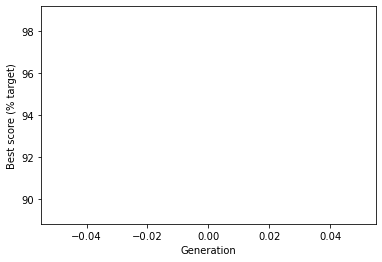

In [6]:
# Plot progress
import matplotlib.pyplot as plt
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()